In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
os.listdir(
    Path.cwd() / 'egs_cost_data'
)

['egs_costs_s_72_2015.csv',
 'egs_costs_s_72_2020.csv',
 'egs_costs_s_72_2025.csv',
 'egs_costs_s_72_2030.csv',
 'egs_costs_s_72_2035.csv',
 'egs_costs_s_72_2040.csv',
 'egs_costs_s_72_2045.csv',
 'egs_costs_s_72_2050.csv']

name
IT1 4     37.564711
IT1 0     47.726136
AT1 0     48.813785
DE1 1     52.111185
CH1 0     52.477725
            ...    
SE2 0     95.357787
SE2 1     96.613479
FR1 9     99.080029
BA1 0    109.127423
FI2 0    111.867747
Name: capex_mean, Length: 70, dtype: float64


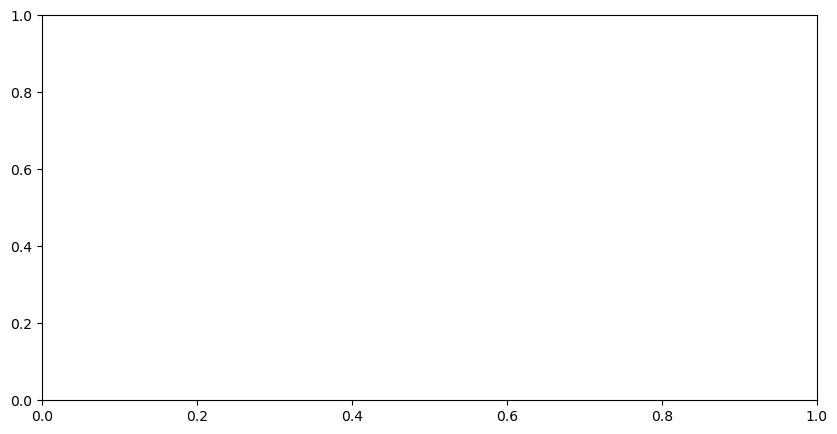

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

for year in [2020, 2025, 2030, 2035, 2040, 2045, 2050][::-1]:

    c = pd.read_csv(
        Path.cwd() / 'egs_cost_data' / f'egs_costs_s_72_{year}.csv'
    ).set_index('name').dropna()['capex_mean'].sort_values() * 1000

    lt = 25
    dr = 0.07
    eta = 0.97
    eta_el = 0.12

    orc_cost_th = 1500 * 1000 * eta_el

    annuity_factor = dr * (1 + dr) ** lt / ((1 + dr) ** lt - 1)

    lcoe = (c * annuity_factor / eta_el + annuity_factor * orc_cost_th) / eta / 8760

    lcoe = (c + eta_el * orc_cost_th) * annuity_factor / (eta * 8760 * eta_el)
    print(lcoe)

    break





plt.show()